In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

import os
from tkinter.filedialog import askdirectory

In [5]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [6]:
file_name

'D:/BISMARK_SOCOMPI/_SHP/Catastro230123.shp'

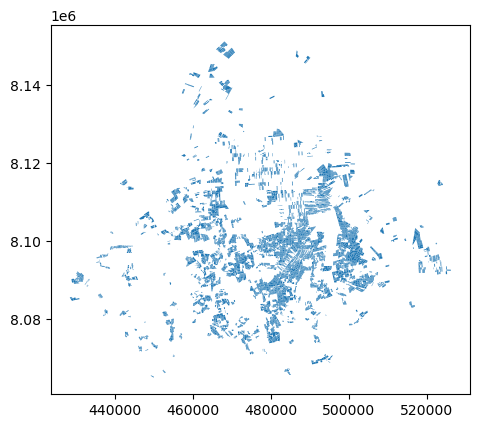

In [7]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)
data.plot()
plt.show()

In [8]:
data.head()

,id,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,L1.3,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-30,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,L1.5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2011-05-20,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,L2.2,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,00005600000L3.1,560,L3.1,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-20,FY,IAG,4,canha,79,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,00005600000L5,560,L5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,RENOVACION,None,F,None,122,renovacion,79,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [9]:
#COD_PROP
#NOM_PROP
#COD_CA
#NOM_CA (CAÑERO CON MAS HECTAREAJE)
#SUPERFICIE CAÑA
#SUPERFICIE EN RENOVACION

In [10]:
# COLUMNAS QUE SI O SI TIENEN QUE ESTAR EN EL CATASTRO A ANALIZAR
prime_columns = [
    'unidad_01', 
    'unidad_02',
    'unidad_03',
    'unidad_04',
    'unidad_05',
    'variedad',
    'fs',
    'textura',
    'soca',
    'cultivo',
    'area',
    'geometry']

In [12]:
# LISTA DE COLUMNAS DEL CATASTRO
data_columns = list(data.columns)
data_columns

['id',
 'unidad_01',
 'unidad_05',
 'unidad_02',
 'unidad_03',
 'unidad_04',
 'variedad',
 'fs',
 'textura',
 'financia',
 'soca',
 'cultivo',
 'zona',
 'area',
 'geometry']

In [13]:
# IDENTIFICAR SI NO EXISTE ALGUNA COLUMNA
error_columns = []
for i in prime_columns:
    if i not in data_columns:
        error_columns.append(i)
error_columns

[]

In [14]:
innecesario_columns = []
for i in data_columns:
    if i not in prime_columns:
        innecesario_columns.append(i)
innecesario_columns

['id', 'financia', 'zona']

In [15]:
data = data.drop(innecesario_columns, axis=1)

In [16]:
data

,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,variedad,fs,textura,soca,cultivo,area,geometry
0,560,L1.3,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-30,FY,4,canha,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560,L1.5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2011-05-20,FY,11,canha,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,560,L2.2,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,CITTCA_85-22,2018-05-20,FY,4,canha,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,560,L3.1,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-20,FY,4,canha,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,560,L5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,RENOVACION,None,F,122,renovacion,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12584,1807,L1,RANCHO--LAZARTE_VICTOR,7542,LAZARTE_PEREZ_VICTOR,UCG_90-20,2022-05-30,F,0,canha,3.264490,"POLYGON Z ((476372.339 8110376.298 0.000, 4765..."
12585,1807,L3,RANCHO--LAZARTE_VICTOR,7542,LAZARTE_PEREZ_VICTOR,UCG_90-20,2019-04-16,FY,3,canha,4.364613,"POLYGON Z ((476292.210 8110596.656 0.000, 4761..."
12586,1807,L6,RANCHO--LAZARTE_VICTOR,7542,LAZARTE_PEREZ_VICTOR,RBB_77-26,2018-06-18,FY,4,canha,4.008848,"POLYGON Z ((476869.846 8110059.932 0.000, 4768..."
12587,1807,L7,RANCHO--LAZARTE_VICTOR,7542,LAZARTE_PEREZ_VICTOR,RBB_77-26,2019-04-20,FY,3,canha,16.784902,"POLYGON Z ((477460.406 8110301.110 0.000, 4774..."


In [17]:
data.dtypes

unidad_01       int64
unidad_05      object
unidad_02      object
unidad_03      object
unidad_04      object
variedad       object
fs             object
textura        object
soca           object
cultivo        object
area          float64
geometry     geometry
dtype: object

In [18]:
data = data.astype({
    'unidad_01':'int', 
    'unidad_02':'string', 
    'unidad_03':'int',
    'unidad_04':'string',
    'unidad_05':'string',
    'variedad':'string',
    'textura':'string',
    'soca':'int',
    'cultivo':'string'
})

In [19]:
data.head()

,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,variedad,fs,textura,soca,cultivo,area,geometry
0,560,L1.3,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-30,FY,4,canha,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560,L1.5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2011-05-20,FY,11,canha,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,560,L2.2,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,CITTCA_85-22,2018-05-20,FY,4,canha,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,560,L3.1,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-20,FY,4,canha,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,560,L5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,RENOVACION,None,F,122,renovacion,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [20]:
data = data[[
    'unidad_01', 
    'unidad_02',
    'unidad_03',
    'unidad_04',
    'unidad_05',
    'variedad',
    'fs',
    'textura',
    'soca',
    'cultivo',
    'area',
    'geometry']]

In [21]:
data.head()

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,area,geometry
0,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FY,4,canha,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,11,canha,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,4,canha,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L3.1,UCG_90-20,2018-05-20,FY,4,canha,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L5,RENOVACION,None,F,122,renovacion,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [22]:
data.dtypes

unidad_01       int32
unidad_02      string
unidad_03       int32
unidad_04      string
unidad_05      string
variedad       string
fs             object
textura        string
soca            int32
cultivo        string
area          float64
geometry     geometry
dtype: object

In [23]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [24]:
data['unidad_02'] = data['unidad_02'].apply(quitar_caracteres)
data['unidad_04'] = data['unidad_04'].apply(quitar_caracteres)
data['variedad'] = data['variedad'].apply(quitar_caracteres)

In [26]:
data.head()

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,area,geometry
0,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG 90-20,2018-05-30,FY,4,canha,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L1.5,UCG 90-20,2011-05-20,FY,11,canha,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA 85-22,2018-05-20,FY,4,canha,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L3.1,UCG 90-20,2018-05-20,FY,4,canha,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,560,LA TUJA IAG SA,15284,ROJAS CORDOVA ROGELIO FELIPE,L5,RENOVACION,None,F,122,renovacion,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [27]:
#os.chdir(r"D:\\")

path = askdirectory(title='Select your folder...')

In [30]:
path

'D:/BISMARK_SOCOMPI/_SHP/NUEVO_CATASTRO'

In [31]:
out_dir = os.path.normpath((path + '/' + 'LOTES.shp' ))
out_dir

'D:\\BISMARK_SOCOMPI\\_SHP\\NUEVO_CATASTRO\\LOTES.shp'

In [32]:
data.to_file(out_dir)

C:\Users\Bismar\.conda\envs\sig_python\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [ ]:


root = tk.Tk()
root.withdraw()


In [185]:

file_path = filedialog.askopenfilename()

In [186]:
file_path

'C:/Users/UTEA/Desktop/PYTHON/utea_scripts/reportes_credito_siembra/CANHERO_PROP.ipynb'